In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import re

import mglearn
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anaso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\anaso\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Ler dados

In [2]:
fN = '/Users/anaso/Documents/AA/AA-22-23/Trabalho Final/imdbFull.p'

D = pickle.load(open(fN, 'rb'))

corpus = D.data
y = D.target
yb = [1 if val>5 else 0 for val in y]

print("Tamanho corpus: {} documentos".format(len(corpus)))
print("Shape target: {}".format(y.shape))
print("Classificações Multiclasse: {}".format(np.unique(y)))
print("Classificações Binárias: {}".format(np.unique(yb)))



Tamanho corpus: 50000 documentos
Shape target: (50000,)
Classificações Multiclasse: [ 1  2  3  4  7  8  9 10]
Classificações Binárias: [0 1]


- Divisão dos dados em treino e teste

In [3]:
text_train, text_test, y_train, y_test = train_test_split(corpus, yb, train_size=0.5, stratify=yb)

print("Type of corpus: {}".format(type(corpus)))
print("Type of text_train: {}".format(type(text_train)))

print("\nTrain: ")
print("Number of documents in text data (train): {}".format(len(text_train)))
print("Samples per class (train): {}".format(np.bincount(y_train)))

print("\nTest: ")
print("Number of documents in text data (test): {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))

Type of corpus: <class 'list'>
Type of text_train: <class 'list'>

Train: 
Number of documents in text data (train): 25000
Samples per class (train): [12500 12500]

Test: 
Number of documents in text data (test): 25000
Samples per class (test): [12500 12500]


<h2 style='color: #3792cb'>Limpeza de dados</h2>

In [4]:
verbose = True
num_critica = 0

In [5]:
if verbose: (print("\nCritica: \n{}".format(text_train[num_critica])))

# Limpeza de quebras de linha ("</ br>")
criticas = [critica.replace("<br />", " ") for critica in text_train]
if verbose: (print("\nCritica sem </ br>: \n{}".format(criticas[num_critica])))

# Mantidos apenas caracteres alfanuméricos
critica_alfanum = [re.sub(r'[^a-zA-Z0-9]+', ' ', critica) for critica in criticas]
print("\nCritica apenas com caracteres alfanuméricos: \n{}".format(critica_alfanum[num_critica]))

# Mantidos apenas caracteres alfabéticos
critica_alfabetica = [re.sub(r'[^a-z]+', ' ', critica.lower()) for critica in criticas]
print("\nCritica apenas com caracteres alfabéticos minusculos: \n{}".format(critica_alfabetica[num_critica]))



Critica: 
The sound is terrible, the picture is worse than worse, the acting is awful, the female leading actress is chubby, and the story is... wait a minute... There is no story...! The plot is really bad and the title of the movie is misleading. If you expect to to see Piranhas, you might be disappointed. This movie has nothing to do with the Piranha movies from 1978 and 1981. Actually, I can only think of one scene involving Piranhas.<br /><br />The only thing that I liked about this movie, besides the fact that it runs for only about 85 minutes, is the song at the end. It's written and sung by Jim Stein and it's called "Love all things that love the sun".<br /><br />I don't recommend this movie. It is so bad it's not even funny to watch. I fell asleep after the first 20 minutes and I am the kind of person who watches anything.

Critica sem </ br>: 
The sound is terrible, the picture is worse than worse, the acting is awful, the female leading actress is chubby, and the story is..

<p style='color: #45b6fe'>- Avaliação sem limpeza</p> 

In [6]:
tf = TfidfVectorizer().fit(text_train)
vocabulary = tf.get_feature_names_out()
print("\nTamanho do dicionário: {}".format(len(vocabulary)))
text_train_p = tf.transform(text_train)

scores = cross_val_score(LogisticRegression(max_iter=1000), text_train_p, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))
print("Cross-validation accuracy: {}".format(scores))


Tamanho do dicionário: 76652
Mean cross-validation accuracy: 0.89
Cross-validation accuracy: [0.8916 0.8884 0.8876 0.8822 0.887 ]


<p style='color: #45b6fe'>- Avaliação Limpeza Alfanumérica</p> 

In [7]:
tf = TfidfVectorizer().fit(critica_alfanum)
vocabulary_alfanum = tf.get_feature_names_out()
print("\nTamanho do dicionário: {}".format(len(vocabulary_alfanum)))
text_train_p = tf.transform(critica_alfanum)

scores = cross_val_score(LogisticRegression(max_iter=1000), text_train_p, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))
print("Cross-validation accuracy: {}".format(scores))


Tamanho do dicionário: 76246
Mean cross-validation accuracy: 0.89
Cross-validation accuracy: [0.8908 0.8914 0.8878 0.8814 0.8874]


<p style='color: #45b6fe'>- Avaliação Limpeza Alfabética</p> 

In [8]:
tf = TfidfVectorizer().fit(critica_alfabetica)
vocabulary_alfab = tf.get_feature_names_out()
print("\nTamanho do dicionário: {}".format(len(vocabulary_alfab)))
text_train_p = tf.transform(critica_alfabetica)

scores = cross_val_score(LogisticRegression(max_iter=1000), text_train_p, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))
print("Cross-validation accuracy: {}".format(scores))


Tamanho do dicionário: 74981
Mean cross-validation accuracy: 0.89
Cross-validation accuracy: [0.8914 0.8912 0.8878 0.8816 0.8866]


<h4 style='color: #3792cb'>Conclusões: </h4>
<ul>
    <li>Sem limpeza o tamanho do dicionário é de 101895 tokens;</li>
    <li>A limpeza alfabética é a que mais diminui o tamanho do dicionário;</li>
    <li>Não existe impacto na performance do classificador binário, independentemente do tipo de limpeza aplicada</li>
    <li>Assim, podemos deduzir que a limpeza alfabética é a melhor limpeza a aplicar neste caso prático, pois diminui o número de tokens (diminuindo a complexidade computacional) sem comprometer a performance do classificador. </li>
</ul>

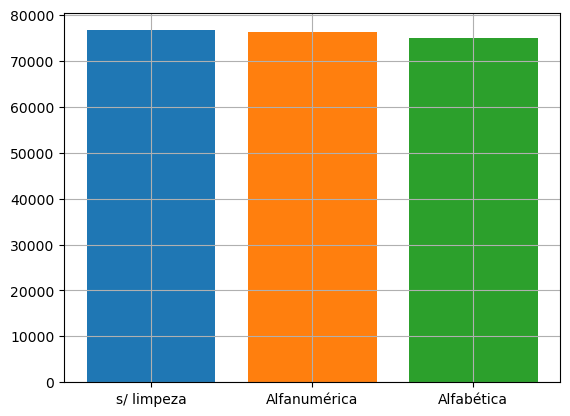

In [9]:
plt.figure()
plt.bar("s/ limpeza", len(vocabulary))
plt.bar("Alfanumérica", len(vocabulary_alfanum))
plt.bar("Alfabética", len(vocabulary_alfab))
plt.grid(True)

plt.show()

<h2 style='color: #3792cb'>Stop Words</h2>

In [10]:
nltk.download('stopwords')
stop_words = set(stopwords.words("english")) 

no_stop_words = [" ".join([(word if word not in (stop_words) else "") for word in critica.split()]) for critica in critica_alfabetica]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anaso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<p style='color: #45b6fe'>- Avaliação Stop Words</p> 

In [11]:
tf = TfidfVectorizer().fit(no_stop_words)
vocabulary_no_stop_words = tf.get_feature_names_out()
print("\nTamanho do dicionário com stop words: {}".format(len(vocabulary_alfab)))
print("Tamanho do dicionário sem stop words: {}".format(len(vocabulary_no_stop_words)))
text_train_p = tf.transform(no_stop_words)

scores = cross_val_score(LogisticRegression(max_iter=1000), text_train_p, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))
print("Cross-validation accuracy: {}".format(scores))


Tamanho do dicionário com stop words: 74981
Tamanho do dicionário sem stop words: 74837
Mean cross-validation accuracy: 0.89
Cross-validation accuracy: [0.8916 0.8914 0.89   0.8846 0.891 ]


<h4 style='color: #3792cb'>Conclusões</h4>
<ul>
    <li></li>
    <li></li>
</ul>

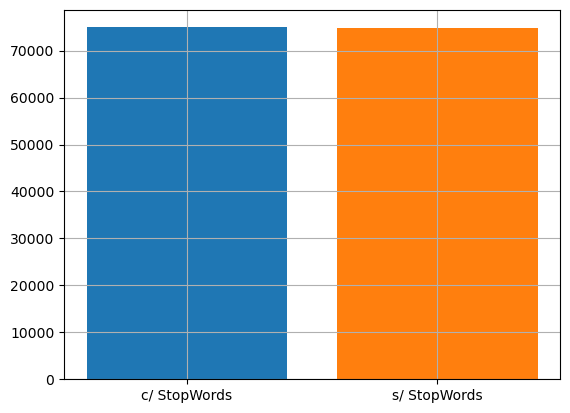

In [12]:
plt.figure()
plt.bar("c/ StopWords", len(vocabulary_alfab))
plt.bar("s/ StopWords", len(vocabulary_no_stop_words))
plt.autoscale()
plt.grid(True)

plt.show()

<h2 style='color: #3792cb'>Tokenização Vs Lemmatização</h2>

In [13]:
def tokenization(documents, stemmer_name="porter"):
    stem = {"porter": PorterStemmer(), 
            "lancaster": LancasterStemmer(), 
            "snowball": SnowballStemmer("english"), 
            "lemma": WordNetLemmatizer()} 

    stemmer = stem.get(stemmer_name) 

    if(stemmer_name=="lemma"):
        return [" ".join([stemmer.lemmatize(word, "v") for word in critic.split()]) for critic in documents]
    else:  
        return [" ".join([stemmer.stem(word) for word in critic.split()]) for critic in documents]


In [14]:
# Sem stop words
docs_porter = tokenization(no_stop_words, stemmer_name="porter")
docs_lanc = tokenization(no_stop_words, stemmer_name="lancaster")
docs_snow = tokenization(no_stop_words, stemmer_name="snowball")  

docs_lemma = tokenization(no_stop_words, stemmer_name="lemma")  

# Com stop words
docs_porter_s = tokenization(critica_alfabetica, stemmer_name="porter")
docs_lanc_s = tokenization(critica_alfabetica, stemmer_name="lancaster")
docs_snow_s = tokenization(critica_alfabetica, stemmer_name="snowball")  

docs_lemma_s = tokenization(critica_alfabetica, stemmer_name="lemma") 

In [15]:
print("Com Stop Words:\n")
print("Critica após limpeza alfabética: \n{}".format(critica_alfabetica[num_critica]))
print("\nCritica com Porter Stemmer: \n{}".format(docs_porter[num_critica]))
print("\nCritica com Lancaster Stemmer: \n{}".format(docs_lanc[num_critica]))
print("\nCritica com Snowball Stemmer: \n{}".format(docs_snow[num_critica]))

print("\nCritica com NetWord Lemmatization: \n{}".format(docs_lemma[num_critica]))




print("Sem Stop Words:\n")
print("Critica após limpeza alfabética: \n{}".format(critica_alfabetica[num_critica]))
print("\nCritica com Porter Stemmer: \n{}".format(docs_porter[num_critica]))
print("\nCritica com Lancaster Stemmer: \n{}".format(docs_lanc[num_critica]))
print("\nCritica com Snowball Stemmer: \n{}".format(docs_snow[num_critica]))

print("\nCritica com NetWord Lemmatization: \n{}".format(docs_lemma[num_critica]))

Com Stop Words:

Critica após limpeza alfabética: 
the sound is terrible the picture is worse than worse the acting is awful the female leading actress is chubby and the story is wait a minute there is no story the plot is really bad and the title of the movie is misleading if you expect to to see piranhas you might be disappointed this movie has nothing to do with the piranha movies from and actually i can only think of one scene involving piranhas the only thing that i liked about this movie besides the fact that it runs for only about minutes is the song at the end it s written and sung by jim stein and it s called love all things that love the sun i don t recommend this movie it is so bad it s not even funny to watch i fell asleep after the first minutes and i am the kind of person who watches anything 

Critica com Porter Stemmer: 
sound terribl pictur wors wors act aw femal lead actress chubbi stori wait minut stori plot realli bad titl movi mislead expect see piranha might disap

<p style='color: #45b6fe'>- Avaliação Porter Stemmer</p> 

In [16]:
tf = TfidfVectorizer().fit(docs_porter)
vocabulary_porter = tf.get_feature_names_out()
print("\nTamanho do dicionário: {}".format(len(vocabulary_porter)))
corpusVect = tf.transform(docs_porter)

scores = cross_val_score(LogisticRegression(max_iter=1000), corpusVect, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))
print("Cross-validation accuracy: {}".format(scores))



# Com stop words
tf = TfidfVectorizer().fit(docs_porter_s)
vocabulary_porter_s = tf.get_feature_names_out()
print("\nTamanho do dicionário: {}".format(len(vocabulary_porter_s)))
corpusVect = tf.transform(docs_porter_s)

scores = cross_val_score(LogisticRegression(max_iter=1000), corpusVect, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))
print("Cross-validation accuracy: {}".format(scores))


Tamanho do dicionário: 51276
Mean cross-validation accuracy: 0.88
Cross-validation accuracy: [0.884  0.8894 0.884  0.881  0.8846]

Tamanho do dicionário: 51342
Mean cross-validation accuracy: 0.88
Cross-validation accuracy: [0.8862 0.8896 0.883  0.8796 0.8862]


<p style='color: #45b6fe'>- Avaliação Lancaster Stemmer</p> 

In [17]:
tf = TfidfVectorizer().fit(docs_lanc)
vocabulary_lanc = tf.get_feature_names_out()
print("\nTamanho do dicionário: {}".format(len(vocabulary_lanc)))
corpusVect = tf.transform(docs_lanc)

scores = cross_val_score(LogisticRegression(max_iter=1000), corpusVect, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))
print("Cross-validation accuracy: {}".format(scores))


# Com stop words
tf = TfidfVectorizer().fit(docs_lanc_s)
vocabulary_lanc_s = tf.get_feature_names_out()
print("\nTamanho do dicionário: {}".format(len(vocabulary_lanc_s)))
corpusVect = tf.transform(docs_lanc_s)

scores = cross_val_score(LogisticRegression(max_iter=1000), corpusVect, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))
print("Cross-validation accuracy: {}".format(scores))


Tamanho do dicionário: 41828
Mean cross-validation accuracy: 0.88
Cross-validation accuracy: [0.8796 0.8858 0.8782 0.8804 0.881 ]

Tamanho do dicionário: 41882
Mean cross-validation accuracy: 0.88
Cross-validation accuracy: [0.8824 0.8854 0.884  0.8772 0.8824]


<p style='color: #45b6fe'>- Avaliação Snowball Stemmer</p> 

In [18]:
tf = TfidfVectorizer().fit(docs_snow)
vocabulary_snow = tf.get_feature_names_out()
print("\nTamanho do dicionário: {}".format(len(vocabulary_snow)))
corpusVect = tf.transform(docs_snow)

scores = cross_val_score(LogisticRegression(max_iter=1000), corpusVect, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))
print("Cross-validation accuracy: {}".format(scores))

# Com stop words
tf = TfidfVectorizer().fit(docs_snow_s)
vocabulary_snow_s = tf.get_feature_names_out()
print("\nTamanho do dicionário: {}".format(len(vocabulary_snow_s)))
corpusVect = tf.transform(docs_snow_s)

scores = cross_val_score(LogisticRegression(max_iter=1000), corpusVect, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))
print("Cross-validation accuracy: {}".format(scores))


Tamanho do dicionário: 50641
Mean cross-validation accuracy: 0.89
Cross-validation accuracy: [0.8846 0.8892 0.8832 0.883  0.8874]

Tamanho do dicionário: 50723
Mean cross-validation accuracy: 0.89
Cross-validation accuracy: [0.886  0.8896 0.8842 0.8794 0.8866]


<p style='color: #45b6fe'>- Avaliação Lemmatização</p> 

In [19]:
tf = TfidfVectorizer().fit(docs_lemma)
vocabulary_lemma = tf.get_feature_names_out()
print("\nTamanho do dicionário: {}".format(len(vocabulary_lemma)))
corpusVect = tf.transform(docs_lemma)

scores = cross_val_score(LogisticRegression(max_iter=1000), corpusVect, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))
print("Cross-validation accuracy: {}".format(scores))



# Com stop words
tf = TfidfVectorizer().fit(docs_lemma_s)
vocabulary_lemma_s = tf.get_feature_names_out()
print("\nTamanho do dicionário: {}".format(len(vocabulary_lemma_s)))
corpusVect = tf.transform(docs_lemma_s)

scores = cross_val_score(LogisticRegression(max_iter=1000), corpusVect, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))
print("Cross-validation accuracy: {}".format(scores))


Tamanho do dicionário: 63776
Mean cross-validation accuracy: 0.89
Cross-validation accuracy: [0.8892 0.89   0.8828 0.8802 0.8892]

Tamanho do dicionário: 63894
Mean cross-validation accuracy: 0.89
Cross-validation accuracy: [0.8906 0.8924 0.8892 0.8796 0.887 ]


<h4 style='color: #3792cb'>Conclusões</h4>
<ul>
    <li>O processo que minimiza o tamanho do dicionário é o Stemming com o algoritmo de Lancaster. </li>
    <li>Aplicando o algoritmo de Snowbal verificamos a perda de 0.01 na percisão do classificador. </li>
    <li>Os processos de stemming não consideram o contexto das palavras pelo que na fase seguinte podemos ter tokens que contém</li>
</ul>

In [20]:
# criticas_teste = ["john bouth a car to visit his mum", "sara is responsable for the mummies in the museum", 
# "My mother is going to take care of me", "can i go to the park", "i bought a canoe to sail on the river", "i will cancel the tour"]

# print("\nOriginal: \n{}".format(criticas_teste))

# print("\nPorter: \n{}".format(tokenization(criticas_teste, stemmer_name="porter")))
# print("\nLancaster: \n{}".format(tokenization(criticas_teste, stemmer_name="lancaster")))
# print("\nSnowball: \n{}".format(tokenization(criticas_teste, stemmer_name="snowball")))

# print("\nLemmatization: \n{}".format(tokenization(criticas_teste, stemmer_name="lemma")))

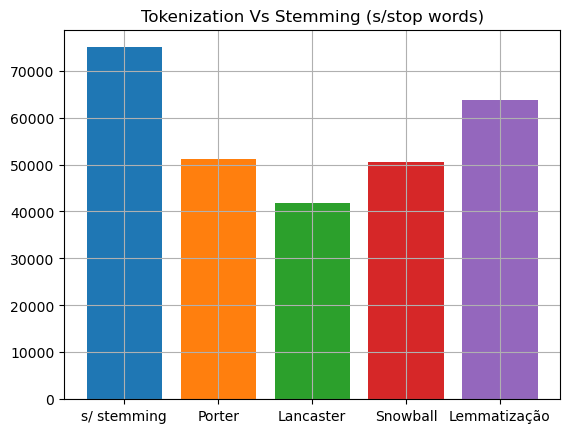

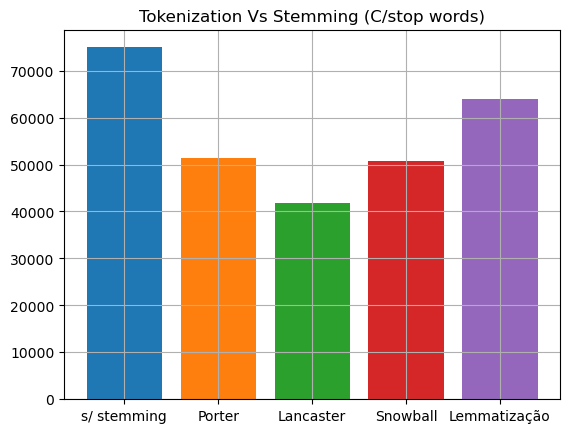

In [21]:
plt.figure()
plt.title("Tokenization Vs Stemming (s/stop words)")
plt.bar("s/ stemming", len(vocabulary_alfab))
plt.bar("Porter", len(vocabulary_porter))
plt.bar("Lancaster", len(vocabulary_lanc))
plt.bar("Snowball", len(vocabulary_snow))
plt.bar("Lemmatização", len(vocabulary_lemma))
plt.autoscale()
plt.grid(True)
plt.show()


plt.figure()
plt.title("Tokenization Vs Stemming (C/stop words)")
plt.bar("s/ stemming", len(vocabulary_alfab))
plt.bar("Porter", len(vocabulary_porter_s))
plt.bar("Lancaster", len(vocabulary_lanc_s))
plt.bar("Snowball", len(vocabulary_snow_s))
plt.bar("Lemmatização", len(vocabulary_lemma_s))
plt.autoscale()
plt.grid(True)
plt.show()

<h2 style='color: #3792cb'>Feature Extraction</h2>